Importing important libraries

In [2]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Import data through pandas 

In [382]:
path = "./temp_data/"
#file_name = path + "imuWed_Feb_14_set1.csv" #"Right_to_left_paralle_to_earth.csv"
file_name = path + "imuWed_Feb_14_set1.csv"
data_file = pd.read_csv(file_name, sep=',',header=0);

In [383]:
data_file.head()
print data_file.shape

(18043, 22)


In [385]:
time = data_file['timestamp'];
gyr = data_file[['GyroX', 'GyroY', 'GyroZ']];
acc = data_file[['AccX', 'AccY', 'AccZ']] ;
#euler = data_file[['roll', 'pitch', 'yaw']]
quaternion = data_file[['orientation_w', 'orientation_x', 'orientation_y', 'orientation_z']]

print acc.shape

(18043, 3)


In [301]:
##Find magnitude of accelerometer(x,y,z) = sqrt(x*x +y*y+ z*z)

acc_mag= np.sqrt(np.square(acc).sum(axis=1))
#acc_mag = np.linalg.norm(acc, axis = 0)
"""0.15836358070373535
0.040863990783691406
0.52789306640625"""

'0.15836358070373535\n0.040863990783691406\n0.52789306640625'

(2831, 3)


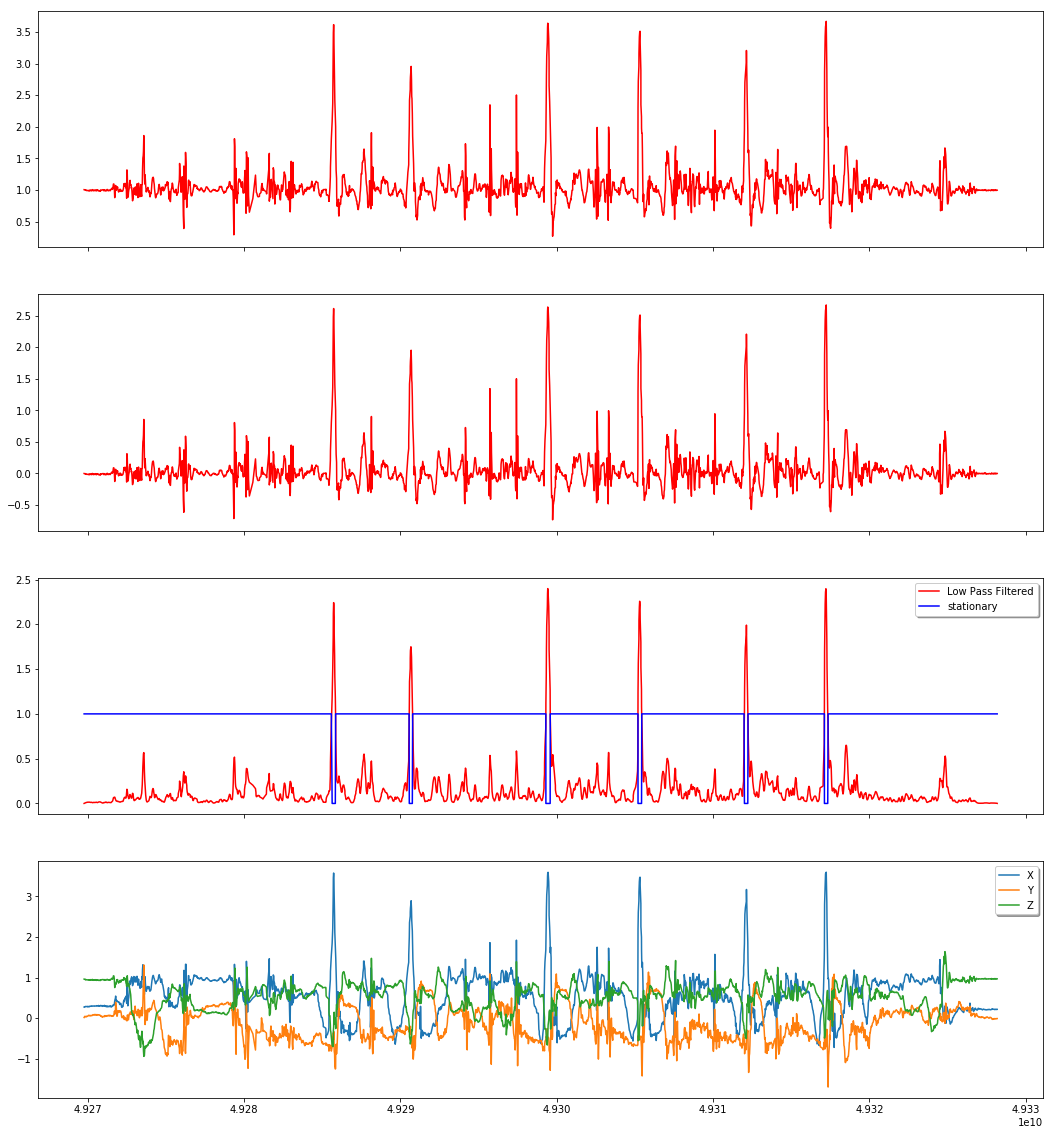

In [341]:

### this can help us detect the stroke itself.
## need to meet a professor from Electrical Department, who can help us understand this part

#HP filter accelerometer data

filtCutOff = .001;
sampleFrequecy = 50;
number_of_pass = 1

b, a =  signal.butter(number_of_pass, (2*filtCutOff) / sampleFrequecy, 'high', analog=False)
acc_magFilt = signal.filtfilt(b, a, acc_mag)

f, (ax4, ax1, ax2, ax3) = plt.subplots(4, sharex=True, figsize=(18,20))
ax4.plot(time, acc_mag, 'r', label="Magnitude");

ax1.plot(time, acc_magFilt, 'r', label="High Pass Filtered");

# Compute absolute value
acc_magFilt = np.absolute(acc_magFilt);

# LP filter accelerometer data
filtCutOff = 5.0;
b, a = signal.butter(number_of_pass, (2*(filtCutOff)/ (sampleFrequecy)), 'low')
acc_magFilt = signal.filtfilt(b, a, acc_magFilt)


stationary = acc_magFilt < 1;

ax2.plot(time, acc_magFilt, 'r', label="Low Pass Filtered");
ax2.plot(time, stationary, 'b', label="stationary");

#stationary = acc_magFilt < 0.5; ### this can help us detect the 
ax2.legend(shadow=True, fancybox=True, loc="upper right");



ax3.plot(time, acc,);

ax3.legend(['X','Y','Z'],shadow=True, fancybox=True, loc="upper right");



 ### this can help us detect the 

print acc.shape



In [357]:
print stationary.shape

print np.where(stationary == False)


getStart = 0
getEnd = 3000

(2831,)
(array([ 731,  732,  733,  734,  735,  736,  737,  738,  739,  740,  741,
        973,  974,  975,  976,  977,  978,  979,  980,  981,  982,  983,
        984, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412,
       1413, 1414, 1415, 1416, 1688, 1689, 1690, 1691, 1692, 1693, 1694,
       1695, 1696, 1697, 1698, 1699, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2277, 2278, 2279, 2280, 2281,
       2282, 2283, 2284, 2285, 2286, 2287, 2288]),)


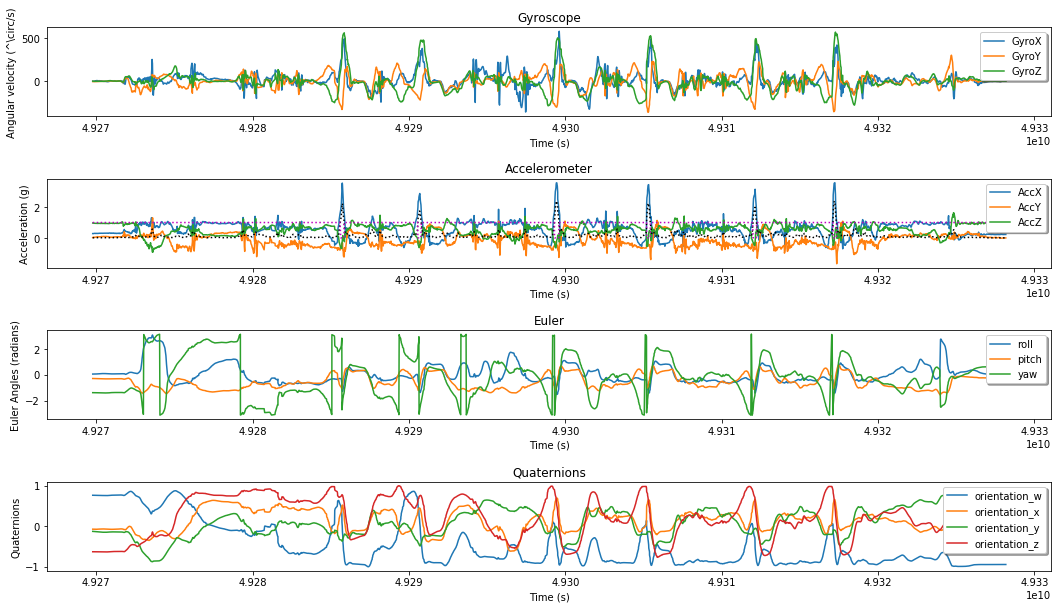

In [381]:
fig = plt.figure('Position', figsize=(18,10));
fig.subplots_adjust(hspace=.7)
plt.subplot(411);
plt.plot(time[getStart:getEnd], gyr[getStart:getEnd]);
plt.title('Gyroscope');
plt.xlabel('Time (s)');
plt.ylabel('Angular velocity (^\circ/s)');
plt.legend(list(gyr),shadow=True, fancybox=True, loc="upper right");
plt.subplot(412);
plt.plot(time[getStart:getEnd], acc[getStart:getEnd]);
plt.plot(time[getStart:getEnd], acc_magFilt[getStart:getEnd], ':k');
plt.plot(time[getStart:getEnd], stationary[getStart:getEnd], ':m');
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Accelerometer');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (g)');
plt.legend(list(acc), shadow=True, fancybox=True, loc="upper right");

plt.subplot(413);
plt.plot(time[getStart:getEnd], euler[getStart:getEnd]);
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Euler');
plt.xlabel('Time (s)');
plt.ylabel('Euler Angles (radians)');
plt.legend(list(euler), shadow=True, fancybox=True, loc="upper right");
plt.subplot(414);
plt.plot(time[getStart:getEnd], quaternion[getStart:getEnd]);
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Quaternions');
plt.xlabel('Time (s)');
plt.ylabel('Quaternions');
plt.legend(list(quaternion), shadow=True, fancybox=True, loc="upper right");


In [359]:
# Convert acceleration measurements to m/s/s
'''quaternion
# Plot translational accelerations
plt.figure('Accelerations');
plt.plot(time[1:100], acc['orientation_x'][1:100], 'r');
plt.plot(time[1:100], acc['orientation_y'][1:100], 'g');
plt.plot(time[1:100], acc['orientation_z'][1:100], 'b');
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");'''

'quaternion\n# Plot translational accelerations\nplt.figure(\'Accelerations\');\nplt.plot(time[1:100], acc[\'orientation_x\'][1:100], \'r\');\nplt.plot(time[1:100], acc[\'orientation_y\'][1:100], \'g\');\nplt.plot(time[1:100], acc[\'orientation_z\'][1:100], \'b\');\nplt.title(\'Acceleration\');\nplt.xlabel(\'Time (s)\');\nplt.ylabel(\'Acceleration (m/s/s)\');\nplt.legend(shadow=True, fancybox=True, loc="upper right");'

In [360]:
def quaternProd(a, b):
    ab = np.zeros(a.shape);
    w, x, y, z = 0, 1, 2, 3
    ab[:,w] = a[:,w]*b[:,w] - a[:,x]*b[:,x] - a[:,y]*b[:,y] - a[:,z]*b[:,z];
    ab[:,x] = a[:,w]*b[:,x] + a[:,x]*b[:,w] + a[:,y]*b[:,z] - a[:,z]*b[:,y];
    ab[:,y] = a[:,w]*b[:,y] - a[:,x]*b[:,z] + a[:,y]*b[:,w] + a[:,z]*b[:,x];
    ab[:,z] = a[:,w]*b[:,z] + a[:,x]*b[:,y] - a[:,y]*b[:,x] + a[:,z]*b[:,w];
    return ab;

def quaternConj(q):
    print q.shape
    ab = np.zeros(q.shape);
    print ab.shape
    w, x, y, z = 0, 1, 2, 3
    ab[:,w] = q[:,w]
    ab[:,x] = -q[:,x]
    ab[:,y] = -q[:,y]
    ab[:,z] = -q[:,z]
    return ab

def quaternRotate(v, q):
    (row, col) = v.shape;
    quaterPoint = np.append(np.zeros((row,1)), v, 1)
    print acc[1:5]
    #v0XYZ = quaternProd(quaternProd(q, acc), quaternConj(q));
    v0XYZ = quaternProd(q, quaternProd(quaterPoint, quaternConj(q)));
    
    return v0XYZ[:, 1:4];

def quaternion2euler(q)

    R(1,1,:) = 2.*q[:,1].^2-1 + 2.*q[:,2].^2;
    R(2,1,:) = 2.*(q(:,2).*q(:,3)-q(:,1).*q(:,4));
    R(3,1,:) = 2.*(q(:,2).*q(:,4)+q(:,1).*q(:,3));
    R(3,2,:) = 2.*(q(:,3).*q(:,4)-q(:,1).*q(:,2));
    R(3,3,:) = 2.*q(:,1).^2-1+2.*q(:,4).^2;    
    
    phi = atan2(R(3,2,:), R(3,3,:) );
    theta = -atan(R(3,1,:) ./ sqrt(1-R(3,1,:).^2) );    
    psi = atan2(R(2,1,:), R(1,1,:) );

    euler = [phi(1,:)' theta(1,:)' psi(1,:)']; 
end


(2831, 4)
(2831, 4)
       AccX      AccY      AccZ
1  0.274414  0.037109  0.964844
2  0.272949  0.047363  0.961914
3  0.285645  0.049805  0.953613
4  0.291992  0.046387  0.949707
(2831, 4)
(2831, 4)
[[0.29150035 0.32354275 0.90442279]
 [0.28158642 0.32409804 0.90431268]
 [0.28033972 0.33614789 0.89550301]
 [0.28491131 0.34073632 0.89002084]]
       AccX      AccY      AccZ
1  0.274414  0.037109  0.964844
2  0.272949  0.047363  0.961914
3  0.285645  0.049805  0.953613
4  0.291992  0.046387  0.949707
       AccX      AccY      AccZ
1  0.017086  0.286433 -0.060421
2  0.008637  0.276735 -0.057601
3 -0.005305  0.286343 -0.058110
4 -0.007081  0.294350 -0.059686


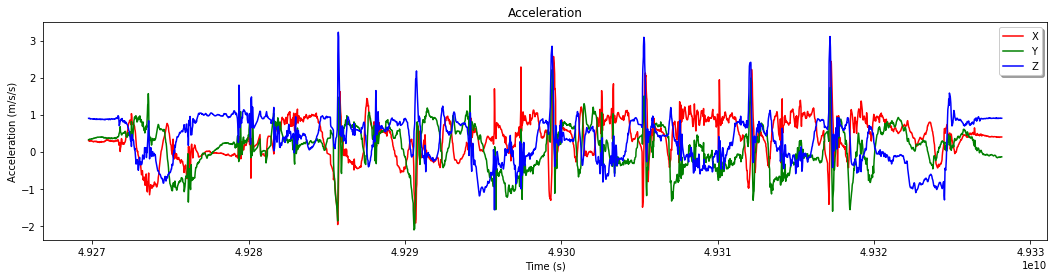

In [361]:
#Compute translational accelerations

accelerometer = acc.copy()
print 
quat = quaternion.as_matrix()

##Rotate body accelerations to Earth frame
accelerometer = quaternRotate( accelerometer, quaternConj(quat));

#Convert acceleration measurements to m/s/s
#acc = acc * 9.81;

plt.figure('Accelerations', figsize= (18,4));
plt.plot(time[getStart:getEnd], accelerometer[getStart:getEnd,0], 'r', label='x' )
plt.plot(time[getStart:getEnd], accelerometer[getStart:getEnd,1], 'g', label='y' );
plt.plot(time[getStart:getEnd], accelerometer[getStart:getEnd,2] , 'b', label='z');
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(["X","Y","Z"], shadow=True, fancybox=True, loc="upper right");


print accelerometer[1:5]
print acc[1:5]
diff = accelerometer - acc
print diff[1:5]


In [362]:
#Compute translational accelerations

accelerometer = acc.copy()
quat = quaternion.as_matrix()

##Rotate body accelerations to Earth frame
accelerometer = quaternRotate( accelerometer, quaternConj(quat));

#Convert acceleration measurements to m/s/s
#acc = acc * 9.81;




(2831, 4)
(2831, 4)
       AccX      AccY      AccZ
1  0.274414  0.037109  0.964844
2  0.272949  0.047363  0.961914
3  0.285645  0.049805  0.953613
4  0.291992  0.046387  0.949707
(2831, 4)
(2831, 4)


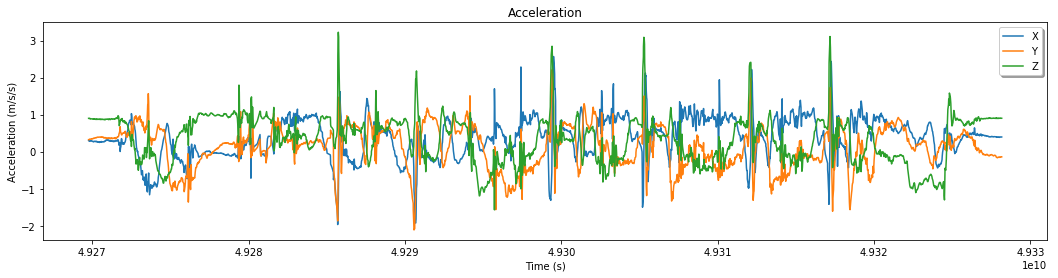

In [363]:
plt.figure('Accelerations', figsize= (18,4));
plt.plot(time[getStart:getEnd], accelerometer[getStart:getEnd,:] );
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(["X","Y","Z"], shadow=True, fancybox=True, loc="upper right");

In [364]:
stationary_diff = np.diff(stationary)
#stationary[0:800] = False

print stationary


[ True  True  True ...  True  True  True]


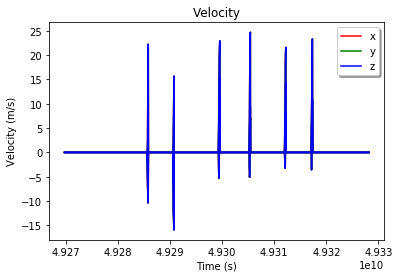

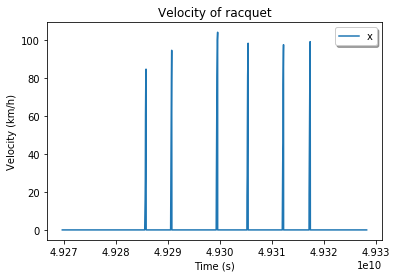

In [365]:
#removing earth's gravity(default ) from z axis

#acc[:,2] = acc[:,2] 9.81;
#samplePeriod = 50;

#Integrate acceleration to yield velocity
vel = np.zeros(accelerometer.shape);
for t in range(1,len(vel)):
    vel[t,:] = vel[t - 1,:] + accelerometer[t,:]# * samplePeriod;
    if(stationary[t] == 1):
        vel[t,:] = [0, 0, 0];     # force zero velocity when foot stationary
    
velDrift = np.zeros(vel.shape);



'''stationaryStart = find([0; diff(stationary)] == -1);
stationaryEnd = find([0; diff(stationary)] == 1);
for i = 1:numel(stationaryEnd)
    driftRate = vel(stationaryEnd(i)-1, :) / (stationaryEnd(i) - stationaryStart(i));
    enum = 1:(stationaryEnd(i) - stationaryStart(i));
    drift = [enum'*driftRate(1) enum'*driftRate(2) enum'*driftRate(3)];
    velDrift(stationaryStart(i):stationaryEnd(i)-1, :) = drift;
end'''
    

             
plt.figure('Velocity');
plt.plot(time[getStart:getEnd], vel[getStart:getEnd], 'r', label="x");
plt.plot(time[getStart:getEnd], vel[getStart:getEnd], 'g', label="y");
plt.plot(time[getStart:getEnd], vel[getStart:getEnd], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

velocity_norm =  np.linalg.norm(vel, axis=1)


plt.figure('Velocity max');
plt.plot(time[getStart:getEnd], ((velocity_norm[getStart:getEnd] * 3.6)), label="x");
plt.title('Velocity of racquet');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (km/h)');
plt.legend(shadow=True, fancybox=True, loc="upper right");


In [366]:
print stationary_diff

[False False False ... False False False]


In [367]:
#print velocity_resultant

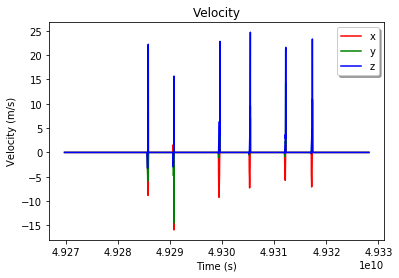

In [368]:
stationary_diff = np.diff(stationary+0)
stationaryStart = np.where(stationary_diff == -1)[0]
stationaryEnd = np.where(stationary_diff == 1)[0]
velDrift = np.zeros(vel.shape);
for i in range(0, len(stationaryEnd)):
    rateDiff = (stationaryEnd[i] - stationaryStart[i])
    driftRate = np.divide(vel[stationaryEnd[i] - 1, :], rateDiff)
    enum = np.arange(0, (stationaryEnd[i] - stationaryStart[i])-1);
    enum = np.array([enum, enum, enum])
    drift = enum.T * driftRate
    velDrift[stationaryStart[i]:stationaryEnd[i]-1, :] = drift;

vel = vel - velDrift;             
plt.figure('Velocity');
plt.plot(time[getStart:getEnd], vel[getStart:getEnd,0], 'r', label="x");
plt.plot(time[getStart:getEnd], vel[getStart:getEnd,1], 'g', label="y");
plt.plot(time[getStart:getEnd], vel[getStart:getEnd,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

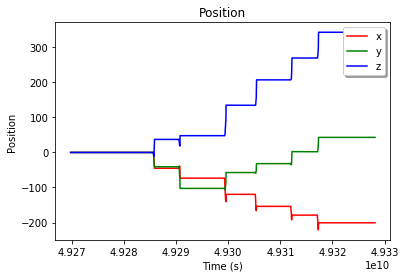

In [369]:
# Compute translational position
# Integrate velocity to yield position


pos = np.zeros(vel.shape);
for t in range(2, len(pos)):
    pos[t] = pos[t-1] + vel[t];    # integrate velocity to yield position
            
plt.figure('Position');

plt.plot(time[getStart:getEnd], pos[getStart:getEnd,0], 'r', label="x");
plt.plot(time[getStart:getEnd], pos[getStart:getEnd,1], 'g', label="y");
plt.plot(time[getStart:getEnd], pos[getStart:getEnd,2], 'b', label="z");
plt.title('Position');
plt.xlabel('Time (s)');
plt.ylabel('Position');
plt.legend(shadow=True, fancybox=True, loc="upper right");

0.0


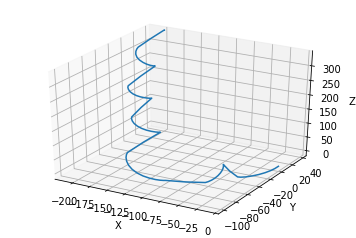

In [391]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
print pos[6,0]
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[:,0],pos[:,1],pos[:,2])

def init():
    ax.set_xlim(np.min(pos[:,0]), np.max(pos[:,0]))
    ax.set_ylim(np.min(pos[:,1]), np.max(pos[:,1]))
    ax.set_zlim(np.min(pos[:,2]), np.max(pos[:,2]))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return ln,

def update(frame):
    ax.view_init(elev=10., azim=frame)
    return ln,

ani = FuncAnimation(fig, update, frames=360,
                    init_func=init, interval = 20, blit=True)

plt.show()

In [390]:
from IPython.display import HTML

HTML(ani.to_html5_video())

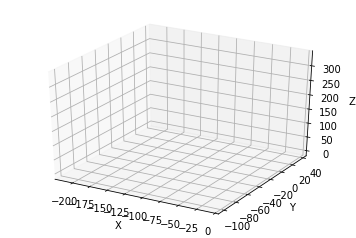

In [402]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ln, = ax.plot([],[],[], animated=True)


def init():
    ax.set_xlim(np.min(pos[:,0]), np.max(pos[:,0]))
    ax.set_ylim(np.min(pos[:,1]), np.max(pos[:,1]))
    ax.set_zlim(np.min(pos[:,2]), np.max(pos[:,2]))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return ln,

rot = 8
def update(frame):
    x = pos[:frame,0]
    y = pos[:frame,1]
    z = pos[:frame,2]
    ln.set_data(x, y)
    ln.set_3d_properties(z)
    global rot
    ax.view_init(elev=10., azim=rot)
    if (frame % 10 == 0):
        rot += 1
    return ln,

ani = FuncAnimation(fig, update, frames=2800,
                    init_func=init, interval = 2, blit=True)

plt.show()

In [403]:
from IPython.display import HTML

HTML(ani.to_html5_video())